In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Transform SalePrice into discrete form
We split SalePrice in the training dataset into three pieces: < 25%, 25%-75%, >75%, and we labeled them low, medium, and high, respectively.

In [4]:
price_interquantile = pd.qcut(df_train['SalePrice'], [0, .25, .75, 1.], labels=['low', 'medium', 'high'])
price_interquantile

0       medium
1       medium
2         high
3       medium
4         high
         ...  
1455    medium
1456    medium
1457      high
1458    medium
1459    medium
Name: SalePrice, Length: 1460, dtype: category
Categories (3, object): [low < medium < high]

### Overview of Dataframe

In [5]:
train_interquantile = df_train.copy()
train_interquantile['Price'] = price_interquantile
train_interquantile = train_interquantile.drop('SalePrice', axis=1)
train_interquantile

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,medium
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,medium
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,high
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,medium
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,medium
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,medium
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,high
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,medium


In [6]:
train_interquantile.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train_interquantile['Price'].describe()

count       1460
unique         3
top       medium
freq         733
Name: Price, dtype: object

In [8]:
train_interquantile["Price_num"] = train_interquantile["Price"].replace({"low":-1, "medium":0, "high":1})

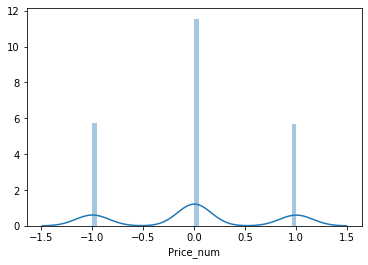

In [9]:
sns.distplot(train_interquantile['Price_num'])

In [10]:
train_interquantile['Price_num'].skew()

0.002890833790993233

In [11]:
train_interquantile['Price_num'].kurt()

-0.991013941070559

### Merge Train and Test
We merge Train and Test considering convenience for one-hot coding as it prevents confusing.

In [12]:
train = pd.read_csv("train.csv")

In [13]:
train_price_interquantile = pd.qcut(train['SalePrice'], [0, .25, .75, 1.], labels=['low', 'medium', 'high'])
train_price = train_price_interquantile
train['Price'] = train_price
train = train.drop('SalePrice', axis=1)

In [14]:
test = pd.read_csv("test.csv")
test_price = pd.read_csv("sample_submission.csv")

In [15]:
# cut test into three pieces based on the interquartile range of training set, which is 0, 129975, 214000, and 755000
test_price_interquantile = pd.cut(test_price['SalePrice'], [0, 129975, 214000, 755000], labels=['low', 'medium', 'high'])
test['Price'] = test_price_interquantile
all_data = pd.concat((train, test))  

In [16]:
# convert label to int for logistic regression
all_data["Price"] = train_interquantile["Price"].replace({"low":-1, "medium":0, "high":1})
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,1


### Missing value

In [17]:
total = all_data.isnull().sum().sort_values(ascending=False)
print(total)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
Foundation          0
Id                  0
Length: 81, dtype: int64


## Model Training

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
data = all_data

In [20]:
data.drop('Id', axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,1


In [21]:
# convert non-continuous int data to str
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

### Impute null value with mean

In [22]:
x = data.loc[:, data.columns!='Price']
mean_cols = x.mean()
x = x.fillna(mean_cols)

### One-hot Coding

In [23]:
x_dum = pd.get_dummies(x)

### Split Train and Test

In [24]:
train_x = x_dum[:1460]
test_x = x_dum[1460:]
train_y = train_price
test_y = test_price_interquantile

### After Preprocessing: visualization with PCA

In [25]:
from yellowbrick.features import PCA

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
pca_y = data['Price'][:1460]
pca_test_y = data['Price'][1460:]

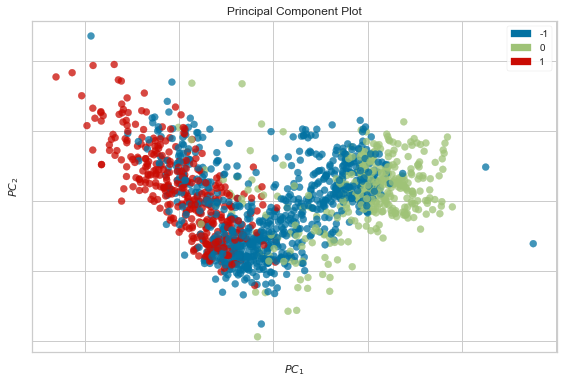

In [27]:
visualizer = PCA(scale=True, classes=[-1,0,1])
visualizer.fit_transform(train_x, pca_y)
visualizer.show()

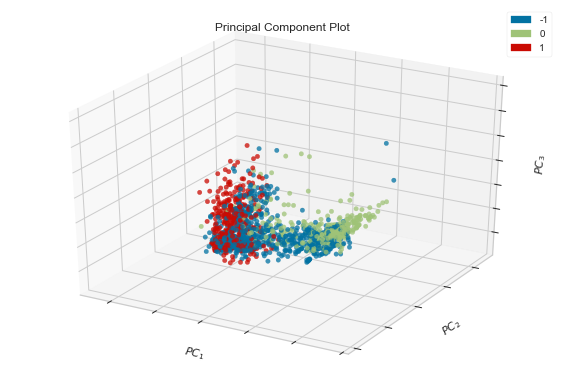

In [28]:
visualizer = PCA(scale=True, projection=3, classes=[-1,0,1])
visualizer.fit_transform(train_x, pca_y)
visualizer.show()

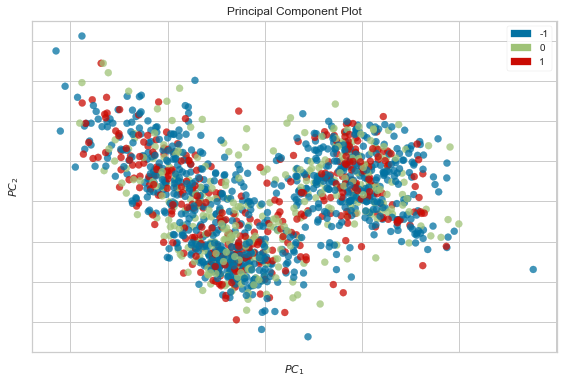

In [29]:
visualizer = PCA(scale=True, classes=[-1,0,1])
visualizer.fit_transform(test_x, pca_test_y)
visualizer.show()

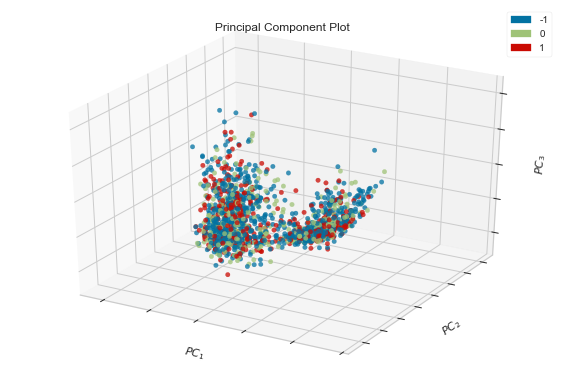

In [30]:
visualizer = PCA(scale=True, projection=3, classes=[-1,0,1])
visualizer.fit_transform(test_x, pca_test_y)
visualizer.show()

### Normalization

In [31]:
from sklearn.preprocessing import normalize

In [32]:
train_x = normalize(train_x, axis = 1)
test_x = normalize(test_x, axis = 1)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=1)

### Model Training

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# generate the results of confusion matrix and display
def confusion_matrix_report(y_pred, y_test):
    con_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrix_df = pd.DataFrame(con_matrix, ('high', 'low', 'medium'), ('high', 'low', 'medium'))
    heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
    bottom, top = heatmap.get_ylim()
    heatmap.set_ylim(bottom + 0.5, top - 0.5)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predict', fontsize=14)
    print(classification_report(y_test, y_pred))

#### Naive Bayes (Bernoulli)

In [35]:
# Note: There is no hyperparameters to tune for NB
bernoulli_nb = BernoulliNB()

# train the classifier using the training data
bernoulli_nb.fit(x_train, y_train)

# y_pred: Predict the labels of the test set
y_pred = bernoulli_nb.predict(x_test)

0.7226027397260274
              precision    recall  f1-score   support

        high       0.66      0.86      0.74        63
         low       0.68      0.87      0.77        86
      medium       0.82      0.57      0.67       143

    accuracy                           0.72       292
   macro avg       0.72      0.77      0.73       292
weighted avg       0.74      0.72      0.72       292



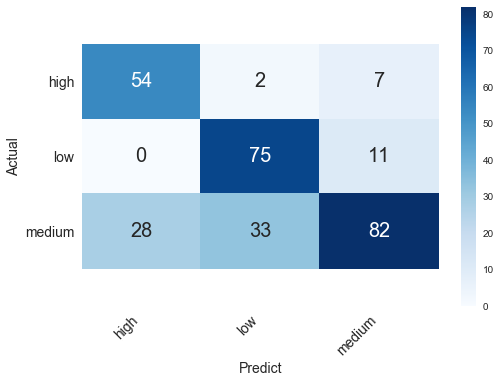

In [36]:
# Evaluate Prediciton of Naive Bayes

# Output the accuracy of our prediction
print(accuracy_score(y_test, y_pred))

# display the predicting based on confusion matrix
confusion_matrix_report(y_pred, y_test)

#### Naive Bayes (Categorical)

In [37]:
# Note: There is no hyperparameters to tune for NB
cat_nb = CategoricalNB()

# train the classifier using the training data
cat_nb.fit(x_train, y_train)

# y_pred: Predict the labels of the test set
y_pred = cat_nb.predict(x_test)

0.4897260273972603
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        63
         low       0.00      0.00      0.00        86
      medium       0.49      1.00      0.66       143

    accuracy                           0.49       292
   macro avg       0.16      0.33      0.22       292
weighted avg       0.24      0.49      0.32       292



/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


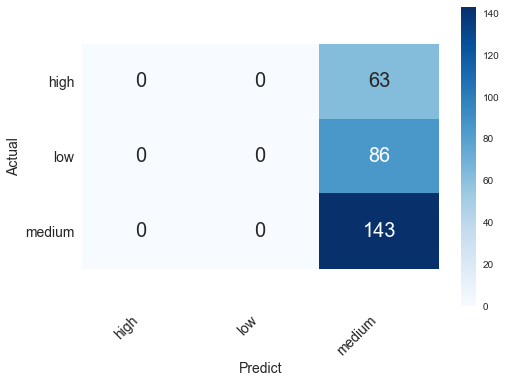

In [38]:
# Evaluate Prediciton of Naive Bayes

# Output the accuracy of our prediction
print(accuracy_score(y_test, y_pred))

# display the predicting based on confusion matrix
confusion_matrix_report(y_pred, y_test)

#### Naive Bayes (Multinomial)

In [39]:
# Note: There is no hyperparameters to tune for NB
multinomial_nb = MultinomialNB()

# train the classifier using the training data
multinomial_nb.fit(x_train, y_train)

# y_pred: Predict the labels of the test set
y_pred = multinomial_nb.predict(x_test)

0.4897260273972603


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        high       0.00      0.00      0.00        63
         low       0.00      0.00      0.00        86
      medium       0.49      1.00      0.66       143

    accuracy                           0.49       292
   macro avg       0.16      0.33      0.22       292
weighted avg       0.24      0.49      0.32       292



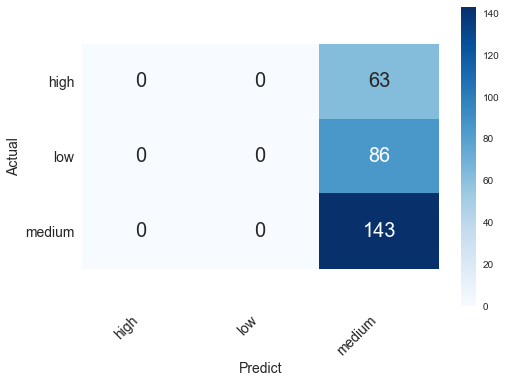

In [40]:
# Evaluate Prediciton of Naive Bayes

# Output the accuracy of our prediction
print(accuracy_score(y_test, y_pred))

# display the predicting based on confusion matrix
confusion_matrix_report(y_pred, y_test)

#### Naive Bayes (Complement)

In [41]:
# Note: There is no hyperparameters to tune for NB
comp_nb = ComplementNB()

comp_nb.fit(x_train, y_train)

# y_pred: Predict the labels of the test set
y_pred = comp_nb.predict(x_test)

0.4897260273972603
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        63
         low       0.00      0.00      0.00        86
      medium       0.49      1.00      0.66       143

    accuracy                           0.49       292
   macro avg       0.16      0.33      0.22       292
weighted avg       0.24      0.49      0.32       292



/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


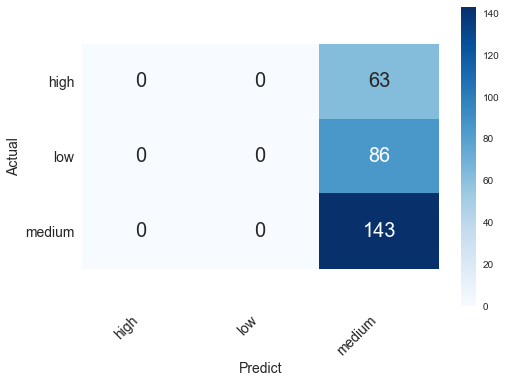

In [42]:
# Evaluate Prediciton of Naive Bayes

# Output the accuracy of our prediction
print(accuracy_score(y_test, y_pred))

# display the predicting based on confusion matrix
confusion_matrix_report(y_pred, y_test)

#### Naive Bayes (Gaussian)

In [43]:
# Note: There is no hyperparameters to tune for NB
gaussian_nb = GaussianNB()

# train the classifier using the training data
gaussian_nb.fit(x_train, y_train)

# y_pred: Predict the labels of the test set
y_pred = gaussian_nb.predict(x_test)

0.6506849315068494
              precision    recall  f1-score   support

        high       0.59      0.92      0.72        63
         low       0.67      0.65      0.66        86
      medium       0.69      0.53      0.60       143

    accuracy                           0.65       292
   macro avg       0.65      0.70      0.66       292
weighted avg       0.66      0.65      0.64       292



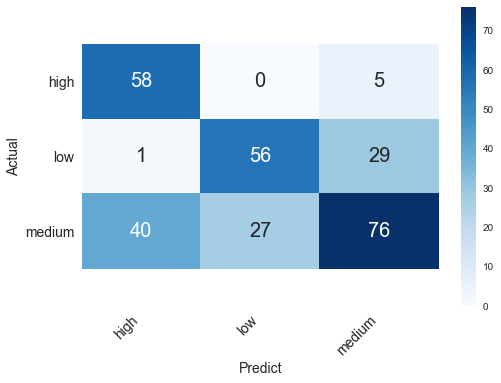

In [44]:
# Evaluate Prediciton of Naive Bayes

# Output the accuracy of our prediction
print(accuracy_score(y_test, y_pred))

# display the predicting based on confusion matrix
confusion_matrix_report(y_pred, y_test)

## Model Testing

#### Naive Bayes (Bernoulli)

In [45]:
result_nb = bernoulli_nb.predict(test_x)

0.34955448937628514
              precision    recall  f1-score   support

        high       0.02      0.17      0.03        41
         low       0.00      0.00      0.00         0
      medium       0.97      0.35      0.52      1418

    accuracy                           0.35      1459
   macro avg       0.33      0.18      0.18      1459
weighted avg       0.94      0.35      0.51      1459



/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


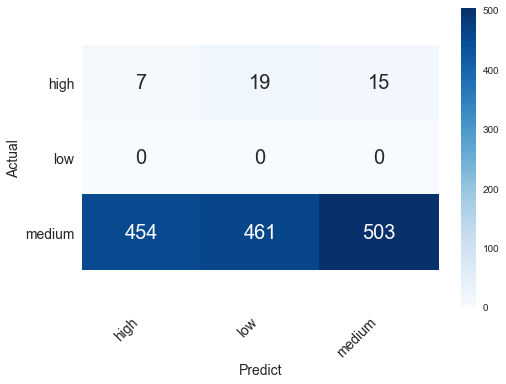

In [46]:
# Output the accuracy of our prediction
print(accuracy_score(test_y, result_nb))

# display the predicting based on confusion matrix
confusion_matrix_report(result_nb, test_y)

#### Naive Bayes (Gaussian)

0.3440712816997944
              precision    recall  f1-score   support

        high       0.04      0.49      0.07        41
         low       0.00      0.00      0.00         0
      medium       0.97      0.34      0.50      1418

    accuracy                           0.34      1459
   macro avg       0.34      0.28      0.19      1459
weighted avg       0.95      0.34      0.49      1459



/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


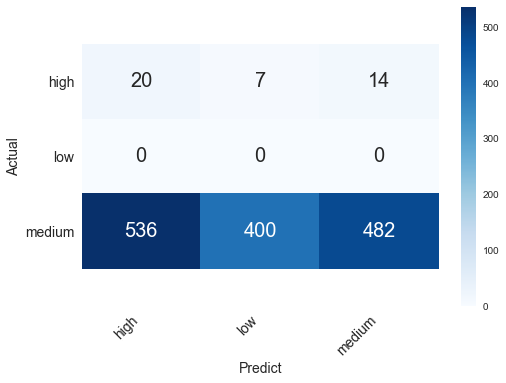

In [47]:
result_nb = gaussian_nb.predict(test_x)
# Output the accuracy of our prediction
print(accuracy_score(test_y, result_nb))

# display the predicting based on confusion matrix
confusion_matrix_report(result_nb, test_y)

#### Naive Bayes (Categorical)

In [48]:
result_nb = cat_nb.predict(test_x)
# Output the accuracy of our prediction
print(accuracy_score(test_y, result_nb))

# display the predicting based on confusion matrix
confusion_matrix_report(result_nb, test_y)

0.971898560657985


ValueError: Shape of passed values is (2, 2), indices imply (3, 3)

In [49]:
#### Naive Bayes (Multinomial)

In [50]:
multinomial_nb
result_nb = cat_nb.predict(test_x)
# Output the accuracy of our prediction
print(accuracy_score(test_y, result_nb))

# display the predicting based on confusion matrix
confusion_matrix_report(result_nb, test_y)

0.971898560657985


ValueError: Shape of passed values is (2, 2), indices imply (3, 3)

### Conclusion

Given our dataset, Logistic Regression has the highest accuracy among the three models (Logistic Regression, SVM, Naive Bayes). SVM has a lower accuracy maybe due to outliers as SVM can be easily impacted by outliers. Also since we didn't preprocess the data thoroughly, it may also negatively affect the result of SVM and Naive Bayes. 